# 3. Game Theoretic Analysis

## Game Model

![payoff_matrix](img/game_theory_payoff.PNG)

Here we analyze the interaction between a type I and a type II agent, this is because the interactions between pairs of (type I, type II) agents are required to complete the task, i.e. for the episode to end. Additionally, a type I agent does not really have any meaningful interaction with another type I agent, and similarly a type II agent does not really have any meaningful interaction with another type II agent.

### Definitions
#### Players
**Type I vs. Type II Agents**

*Type I Agent:* Represents an agent which is responsible for picking up an item at location A and subsequently delivering it to a (free, i.e. not currently holding an item) type II agent.

<!-- optimized for efficiency in picking up an item at location A followed by delivering it to a type II agent. It often has the capability to swiftly locate fixed targets and adapt to the dynamic behaviour of type II agent. -->

*Type II Agent:* Represents an agent which is responsible for receiving an item from a type I agent via a handover and subsequently delivering it to location B.


<!-- that will achieve the goal of delivering an item to location B after obtaining it from a type I agent via a handover. While it can accomplish individual tasks, the payoff it gets for each goal will be heavily dependent on the type I agent's strategy since it can only deliver the item to location B when type I agent successfully completes its responsibility. -->

#### Actions

actions of each agent (player) are split into 2 strategies corresponding to each agent's two primary goals:
- Type I Agent: 
    - Find A, 
    - Find Type II Agent (note that this target is only achieved if the type I agent reaches a type II agent *not* holding an item)
- Type II Agent: 
    - Find Type I Agent (note that this target is only achieved if the type II agent reaches a type I agent *holding an item*), 
    - Find B

For example: the second row in the matrix, *(Random Policy, Find Type II Agent)*, means that the type I agent follows a Random Policy (as defined below) from its start position to location A, and once it obtains the item, it proceeds to take the shortest path towards the closest type II agent (this is discussed more in the sections below).


**Random policy** 

When an agent adopts a random policy, their actions lack any specific direction or intent. This randomness means the agent is navigating and making decisions arbitrarily without optimizing for a particular outcome. In the context of the given task, the agent might wander aimlessly, potentially overlooking its target. As a result, it may take a lot more movements than is required to reach their target. *Note that this somewhat approximates the behaviour of an agent with an untrained DQN model*.

<!-- and there's no guarantee the agent will successfully complete the desired goals. -->
-  Impact on Payoff: The randomness inherently reduces efficiency, making tasks more time-consuming and uncertain in terms of outcome. Such a policy is generally associated with lower payoffs, as seen in the matrix. This serves as an implicit discouragement for agents to adopt a random strategy unless strategically necessary.

<!-- **Goal Representation**

The matrix cells correspond to scenarios where each agent have two primary goals:

- Type I Agent: Find A, Find Agent II
- Type II Agent: Find Agent I, Find B -->

#### Payoff

Payoff values in each cell is represented as a tuple $(p_1, p_2)$ where $p_1,p_2\in\mathbb{R}$ are the payoff values for the type I (row player) and type II (column player) agents respectively. These values are determined by the efficiency with which the target was reached. The more efficient, the larger the payoff and vice versa. Efficiency is measured by the number of moves taken to reach the target from the agent's current location. 

The exact way in which the payoff values were derived is described in the sections below along with the justification of why that method was used.

<!-- *Task Completion:* Completing the tasks for example *Find A or B* or *Find Agent I or II* contributes positively to the payoff.

*Time Taken:* Efficiency is key. The faster an agent can accomplish its goals, the higher the payoff. Conversely, taking too long may result in reduced payoffs due to inefficiencies or potential missed opportunities.


**<u> For each task's payoff: </u>**

**For finding A or B:**

- For completely Random Policy: +10
- For optimal no. of moves to find target: +30

**For finding Agent I or II:**

- For completely Random Policy: +10
- For Type I Agent doing random policy, Type II Agent actively finding Type I Agent : +20
- For Type I Agent actively finding Type II Agent, Type II Agent doing random policy: +20

(In this case fewer moves are needed to complete goal compared to completely random policy but still less optimal than full cooperation.)

- For both agents cooperating to find each other for handover: +30 -->

### Simplifications / Abstractions Made
1. Assumes that when adopting the random policy, at some point, the agent(s) reach their target(s), and thus at some finite timestep, the game eventually ends. 

2. Individual movements are abstracted as we consider sequences of movements which are grouped into different policies.

3. Move penalty is heavily simplified. Following our implementation, we approximate a movement penalty when the agent reaches the target. Instead of directly taking the number of moves taken by an agent from (start point) $\rightarrow$ (target), the number of moves taken is instead categorized into three broad groups:  [optimal, sub-optimal, poor], with fixed associated payoffs: [30, 20, 10]. This is why, in the payoff matrix you can see that the associated payoffs for *(Random Policy, $x$)* is always lower than *(Find ..., $x$)* policies *(see Justification for the reasoning and full workings of each cell's payoff)*
<!-- Due to random agent spawn positions and due to the random actions taken from *Random Policy*, even when both players choose the same strategies in episode $e_i$ as in $e_{i-1}$, they may reach their targets in vastly different number of moves. Thus, we simplify the reward assignment by introducing three different levels to categorize the number of moves taken from (start point) $\rightarrow$ (target):  [optimal, sub-optimal, poor], with associated rewards: [10, 20, 30] *(see Justification for the full workings of each reward)* -->
4. Assumes that for non-random policies (Find ... policies), the agent can and does take the shortest path between its current position and its target.

5. If there are multiple targets, for example if there are multiple type I or type II agents, assume that the agent can and does choose its target as the one closest to its current position

### Limitations
1. Although simplification 1 assumes that the game ends at some finite step this is not bounded by any particular constant, and thus games can be incredibly long which may not match implementation.

2. Due to simplification 1, it is impossible for a game to go on indefinitely.

3. Assumption 4 requires a perfectly trained model that will reliably direct the agent through the shortest path to their target.

4. There is a large variety of movement sets within each group. for example, following random policy, an agent might get lucky and stumble upon its arget within a few moves, but might get very unlucky and reach its target in hundreds or even thousands of moves, and obviously the latter would have a much larger movement penalty than the former. However, with this model we are limited to summarize the large variety of payoffs for all these movement sets with a single value.

5. Only considers two broad groups of policies: unbiased random policy (*Random Policy*), and shortest path policies (*Find ...*) which may not encompass all possible strategies in practice.


### Implications
1. Limitation 1 is infeasible when comparing with the DQN implementation because an untrained model may suggest looping movements (left->right->left->right->...) indefinitely, thus a hard stop is implemented (as 2*grid size). Therefore this aspect of the game theory model differs from the implementation and thus corresponding analysis may not be accurate for these scenarios.

2. Limitation 2 means that this game theory model is unable to model the behaviour of games that go on indefinitely.

3. A perfectly trained model is incredibly difficult to obtain in practice, as we can see in the DQN implementation, a nearly perfect model can be obtained with much tuning, though losses are never all 0. Thus, assumption 4 may be infeasible for certain scenarios wherein the sub-optimal DQN model suggests a slightly longer path than the shortest path to the target and thus receive worse payoff than is expected.

4. Due to limitation 4. the heavy abstraction required to obtain a single payoff value for each cell means that for many movement sets, the actual payoff is vastly different than the expected payoff. This abstraction oversimplifies the behaviour and analysis of the movements within each group.

5. Limitation 5 misses out on some movement behaviour that we see in the implementation and thus might not accurately represent all the possible actions and interactions within the game, for example: even though *Random Policy* behaves somewhat like an agent with an untrained model in the sense that it moves around without purpose, unlike *Random Policy*, the DQN model chooses actions greedily, which means that if at some position $p$, the highest q-value is for the action: `Move Right`, and in the new position $p+1$, the highest q-value is the action `Move Left`, it will keep looping between these two positions indefinitely, this is not something can be modelled with *Random Policy*.

### Justifications
- We split the sequences of movements performed by an agent in an episode into two sets per agent, for example: *(Random Policy, Random Policy)* or *(Find Type I Agent, Random Policy)* to reflect the fact that each agent has 2 distinct targets per episode:
    - Type I agent's first target is location A (picking up the item), and its second target is to reach a Type II agent 
    - Type II agent's first target is the type I agent and its second target is to reach B
    
These targets behave very differently -- the first and second targets of type I and type II agents respectively are static whereas the second and first targets of type I and type II agents respectively are dynamic and more than that, they are inextricably tied to the other player's movements. Thus we separately consider the two targets to account for this difference in nature.

- Simplification 3 is required because of the random agent spawn positions and the random actions taken when following *Random Policy* which means that, even when both players choose the same strategies in episode $e_i$ as in $e_{i-1}$, they may reach their targets in vastly different number of moves. Thus, the payoff assignment needs to be vastly simplified and grouped into three categories: [optimal, sub-optimal, poor], with fixed associated rewards: [30, 20, 10].

- Simplifications 1, 2, and 4 are a result of adopting the classical game theory framework wherein the execution of the selected actions by both players will result in the end of an episode (simplification 1), this is why we formulate the problem not in terms of individual movements, but as whole sequences of movements at once (simplification 2). 
    - For example: if the type I agent selects *(Random policy, Find Type II Agent)* and the type II agent selects *(Find Type I Agent, Random Policy)*, the type I agent employs a random policy to reach A, and simplification 1 ensures that the type I agent reaches A at some point, and from simplification 4, the type I and type II agents which adopt the *Find Type II Agent* and *Find Type I Agent* policies will meet taking the shortest possible path between the two and thus performing the handover. And finally simplification 1 again ensures that when the type II agent adopts the *random policy* after the handover, that it reaches B at some finite timestep and ends the game.
    - Furthermore, simplification 4 is a decent approximation because as we can see from the DQN implementation, we can train a near-perfect model.
    

- The payoff of a particular agent following a particular strategy is the sum of individual payoffs for reaching the first and then the second target.
    - For the static targets, the payoff is purely dependent on the policy adopted by that agent:
        - For Type I agent: if they adopt *Find A* policy, the distance moved will be minimal and thus they will receive the maximum payoff 30 for this stage.
        - For Type II agent: if they adopt *Find B* policy, the distance moved will be minimal and thus they will receive the maximum payoff 30 for this stage.
    - For the dynamic targets, it is slightly more complicated, and payoffs are affected by the policy adopted by that agent but also by the other agent. There are three cases:
        1. Both Type I and Type II agents adopt *Random policy* for the handover stage: in this case both agents will wander around aimlessly and thus would meet at a poor handover point likely after many movements, i.e. very high move penalty, thus this receives the lowest payoff of 10.
        2. Type I adopts *Find Type II Agent* policy while Type II adopts *Random policy* or Type I adopts *Random policy* while Type II adopts *Find Type I Agent*: in this case, while one agent wanders around aimlessly, the other agent is actively pursuing the wandering agent, and since the wandering agent is not actively avoiding the other agent, it is conceivable that it will meet at a sub-optimal handover point, and thus requiring less movement than case 1, thus it receives the middle payoff amount of 20.
        3. Type I adopts *Find Type II Agent* policy and Type II adopts *Find Type I Agent*: in this case, both are actively pursuing each other and will meet at the most efficient hand-over point, requiring the least number of moves, i.e. lowest move penalty, thus it receives the highest payoff of 30.
    - The payoffs are calculated following this definition, and is implemented in python below.


In [ ]:
import numpy as np
rows = [("Random Policy", "Random Policy"), ("Random Policy", "Find Type II Agent"), ("Find A", "Random Policy"), ("Find A", "Find Type II Agent")]
cols = [("Random Policy", "Random Policy"), ("Random Policy", "Find B"), ("Find Type I Agent", "Random Policy"), ("Find Type I Agent", "Find B")]

payoff_matrix = np.zeros((4, 4, 2))

distance_payoff_map = {
    "optimal": 30,
    "sub-optimal": 20,
    "poor": 10
}

for row_idx, (pol_I_1, pol_I_2) in enumerate(rows):
    for col_idx, (pol_II_1, pol_II_2) in enumerate(cols):
        agent_I_payoff_A = distance_payoff_map["optimal"] if pol_I_1 == "Find A" else distance_payoff_map["poor"]
        if pol_I_2 == pol_II_1 == "Random Policy":
            agent_I_payoff_handover = distance_payoff_map["poor"]
            agent_II_payoff_handover = distance_payoff_map["poor"]
        elif pol_I_2 == "Find Type II Agent" and pol_II_1 == "Find Type I Agent":
            agent_I_payoff_handover = distance_payoff_map["optimal"]
            agent_II_payoff_handover = distance_payoff_map["optimal"]
        else:
            agent_I_payoff_handover = distance_payoff_map["sub-optimal"]
            agent_II_payoff_handover = distance_payoff_map["sub-optimal"]
        agent_II_payoff_B = distance_payoff_map["optimal"] if pol_II_2 == "Find B" else distance_payoff_map["poor"]
        payoff_matrix[row_idx, col_idx, :] = (agent_I_payoff_A + agent_I_payoff_handover, agent_II_payoff_handover + agent_II_payoff_B)


In [ ]:
payoff_matrix

array([[[20., 20.],
        [20., 40.],
        [30., 30.],
        [30., 50.]],

       [[30., 30.],
        [30., 50.],
        [40., 40.],
        [40., 60.]],

       [[40., 20.],
        [40., 40.],
        [50., 30.],
        [50., 50.]],

       [[50., 30.],
        [50., 50.],
        [60., 40.],
        [60., 60.]]])

### Advantages

- Although this model only explicitly considers a pair of type I and type II agents, it can be easily replicated for each pair of type I and type II agents in the game to analyze the overall behaviour very little dependency between different agent pairs.
- This model is not particularly constrained to a particular grid size, thus is generalizable to any grid size.

## Model Analysis

<!-- From the matrix table, we can further generalize the actions of the agents as follows.
- Coop-Coop $\rightarrow$ Both agents strategically accomplish the task using minimal effort for reaching location A, handover point and location B
- Coop-Defect $\lor$ Defect-Coop $\rightarrow$ One of the agent plays randomly for at least one of the goals, resulting in suboptimal strategy
- Defect-Defect $\rightarrow$ Both agent plays randomly on at least one of the targets using least optimal effort in accomplishing the task

Let's break down the scenarios:

1. **Both Cooperate (Coop-Coop):** This represents the optimal handover scenario. Both agents are actively working towards a common goal, ensuring a seamless and efficient handover. In the context of the provided matrix, when both Type I and Type II agents choose strategies that aim to find a specific item/agent (*Find ...* policies), they are working cooperatively, leading to the best combined outcome. In terms of payoff, the (60,60) result represents the maximum joint utility, signifying that both agents benefit the most from this collaborative approach.

2. **One Cooperates, One Defects (Coop-Defect or Defect-Coop):** This scenario is sub-optimal. One agent is working towards the goals while the other is not, resulting in a finding/handover process that is less efficient than when both cooperate. One example is would be (Random Policy, Find Type II) for Type I and (Find Type I, Find B) for Type II The defector may get a short-term advantage, as seen in some payoffs like (60,40) or (30,50), but this comes at the expense of the overall efficiency. The cooperator gets a lower payoff because their effort isn't reciprocated, as the finding item/agent targets require more time to be accomplished.

3. **Both Defect (Defect-Defect):** This represents the least efficient scenario. Neither agent is genuinely working towards their end goals, causing possible delays and less efficiency. One of the actions would be (Random Policy, Find Type II) for Type I Agent and (Random Policy, Find B) for Type II Agent, their mutual lack of cooperation harms both their individual and combined outcomes. The (20,20) result in the matrix highlights the minimal payoff both agents receive when neither is willing to cooperate, in which both chosen the (Random Policy, Random Policy) policies.  -->


**1. Dominant Strategy**

A dominant strategy $s$ for player $x$ dominates another strategy $s′$ if for all possible choices of a strategy $t$ for player $y$, the outcome of $s$ is at least as good as that of $s′$ and $s$ is better than $s′$ for at least one choice of $t$.

<!-- A dominant strategy for a player in a game is one where that strategy is the best one to adopt regardless of what strategy the other players adopt.  -->

We can find the 2 dominant strategies for both types of agent as shown below.

**Type I Agent**

To obtain the dominant strategy for Type I agent, we have to look at all strategies by Type II agent (all columns of the table) and pick the best response (specified row of the table) to all the strategies.

- Considering the 1st column of the table where Type II agent performs random policy all the time, we note that the strategy "Find A, Find Type II Agent" (4th row) would give the highest payoff of 50. 
- When Type II agent performs strategy "Random Policy, Find B" (2nd column), Type I agent's best response is still "Find A, Find Type II Agent" (4th row) with payoff of 50.

![table_1](img/dominant_working_1.jpg)
- As for third column where Type II agent finds type I agent followed by random policy, Type I agent would obtain the highest payoff of 60 if it chooses to "Find A, Find Type II Agent" (4th row).
- Lastly, if Type II agent choose to play "Find Agent I, Find B", Type I agent would obtain the highest payoff of 60 by following the strategy, "Find A, Find Type II Agent" .

![table_2](img/dominant_working_2.jpg)

"Find A, Find Type II Agent" is the best response under all strategies of Type II agent as it consistently provides the highest payoff across all strategies and hence it is a dominant strategy.


**Type II Agent**

To obtain the dominant strategy for Type II agent, we have to look at all strategies by Type I agent (all rows of the table) and pick the best response (specified column of the table) to all the strategies.

- Considering the 1st row of the table where Type I agent performs random policy all the time, we note that the strategy "Find Type I agent, Find B" (4th column) would give the highest payoff of 50. 
- When Type I agent performs strategy "Random Policy, Find Type II Agent" (2nd row), Type II agent's best response is still "Find Type I Agent, Find B" (4th column) with payoff of 60.

![table_3](img/dominant_working_3.jpg)
- As for the third row where Type I agent finds A followed by random policy, Type II agent would obtain the highest payoff of 50 if it chooses to "Find Type I Agent, Find B" (4th column).
- Lastly, if Type I agent chose to play "Find A, Find Type II Agent", Type II agent would obtain the highest payoff of 60 by following the strategy, "Find Type I Agent, Find B".

![table_4](img/dominant_working_4.jpg)

Type II agent's best response under all strategies of Type I agent is "Find Type I Agent, Find B" as it consistently provides the highest payoff across all strategies and hence it is a dominant strategy.

To better visualize this, the left heatmap below shows the payoff matrix for Type I agent for every strategy combination, and the right heatmap shows the payoff matrix for Type II agent for every strategy combination. As you can see the last row for the type I agent consistently has the highest payoff while the last column for the type II agent consistently has the highest payoff.

In [2]:
## REMOVE LATER AFTER MERGE!!!
import matplotlib.pyplot as plt
import numpy as np

In [5]:
def draw_payoff(payoff_1, payoff_2, labels_1, labels_2, figsize=(14, 14), label_outcomes=False):
    fig, axs = plt.subplots(1, 2, figsize=figsize)
    axs[0].title.set_text('Payoff for Type I Agent')
    im = axs[0].imshow(payoff_1)
    axs[0].set_xticks(np.arange(payoff_1.shape[1]), labels=labels_2)
    axs[0].set_yticks(np.arange(payoff_1.shape[0]), labels=labels_1)

    axs[0].tick_params(top=True, bottom=False,
                    labeltop=False, labelbottom=True)

    axs[0].set_xticks(np.arange(payoff_1.shape[1]+1)-.5, minor=True)
    axs[0].set_yticks(np.arange(payoff_1.shape[0]+1)-.5, minor=True)
    axs[0].grid(which="minor", color="w", linestyle='-', linewidth=1)

    if (label_outcomes):
        for i in range(payoff_1.shape[0]):
            for j in range(payoff_1.shape[1]):
                label = "$o_{" + str(payoff_1.shape[0]*i+j) + "}$"
                text = axs[0].text(j, i, label,
                            ha="center", va="center", color="r")

    plt.setp(axs[0].get_xticklabels(), rotation=30, ha="right",
                rotation_mode="anchor")

    plt.colorbar(im, shrink=0.2)

    axs[1].title.set_text('Payoff for Type II Agent')
    im = axs[1].imshow(payoff_2)

    axs[1].set_xticks(np.arange(payoff_2.shape[1]), labels=labels_2)
    axs[1].set_yticks(np.arange(payoff_2.shape[0]), labels=labels_1)

    axs[1].tick_params(top=True, bottom=False,
                    labeltop=False, labelbottom=True)

    axs[1].set_xticks(np.arange(payoff_2.shape[1]+1)-.5, minor=True)
    axs[1].set_yticks(np.arange(payoff_2.shape[0]+1)-.5, minor=True)
    axs[1].grid(which="minor", color="w", linestyle='-', linewidth=1)

    if (label_outcomes):
        for i in range(payoff_2.shape[0]):
            for j in range(payoff_2.shape[1]):
                label = "$o_{" + str(payoff_2.shape[0]*i+j) + "}$"
                text = axs[1].text(j, i, label,
                            ha="center", va="center", color="r")

    plt.setp(axs[1].get_xticklabels(), rotation=30, ha="right",
                rotation_mode="anchor")

    plt.colorbar(im, shrink=0.2)
    fig.tight_layout()

    plt.show()

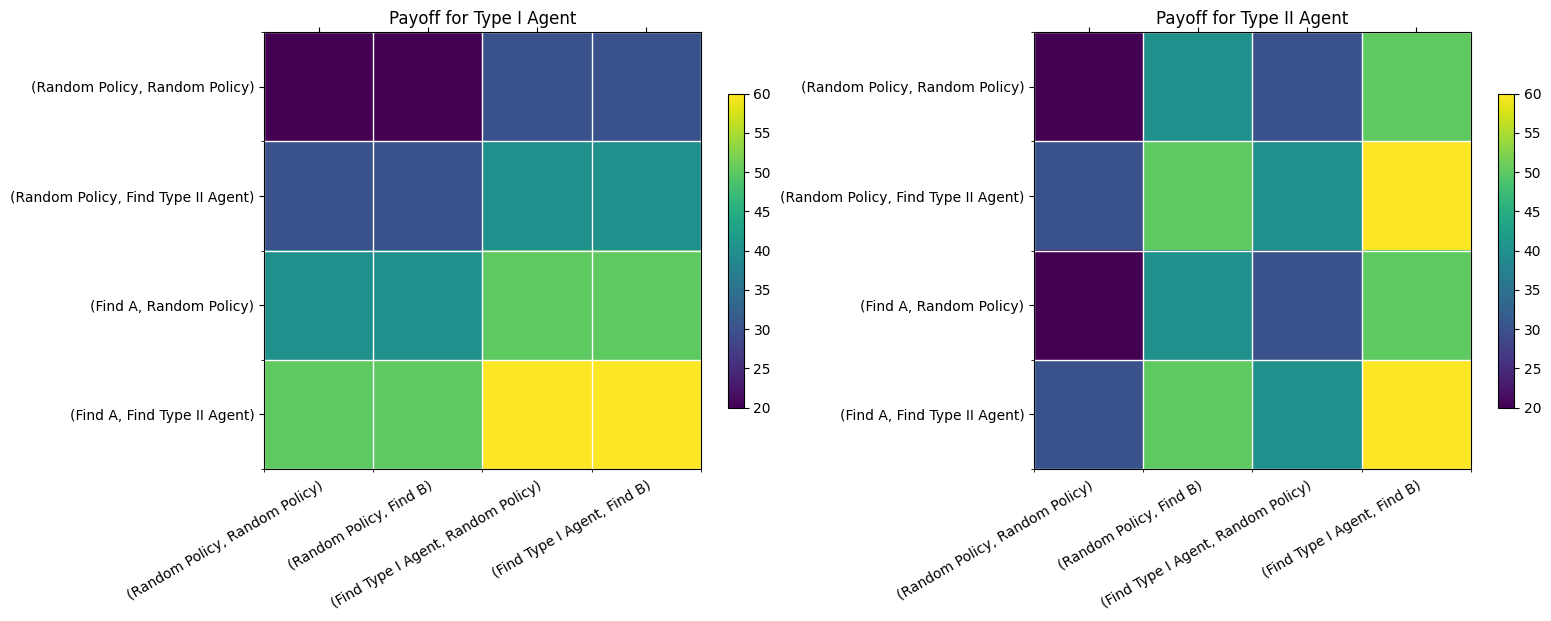

In [7]:
PAYOFF_1 = np.array([[20, 20, 30, 30],
                     [30, 30, 40, 40],
                     [40, 40, 50, 50],
                     [50, 50, 60, 60]])
PAYOFF_2 = np.array([[20, 40, 30, 50],
                     [30, 50, 40, 60],
                     [20, 40, 30, 50],
                     [30, 50, 40, 60]])
LABELS_1 = ["(Random Policy, Random Policy)","(Random Policy, Find Type II Agent)", 
            "(Find A, Random Policy)", "(Find A, Find Type II Agent)"]
LABELS_2 = ["(Random Policy, Random Policy)", "(Random Policy, Find B)", 
            "(Find Type I Agent, Random Policy)", "(Find Type I Agent, Find B)"]

draw_payoff(PAYOFF_1, PAYOFF_2, LABELS_1, LABELS_2, figsize=(16, 16))

**2. Pareto Optimal**

An outcome $o^*$ is pareto optimal if no other outcome $o$ pareto dominates it.

The heatmaps below show the payoff matrix for Type I and Type II agents with the outcomes labelled.

For type I agent: $o_{14}$ and $o_{15}$ both result in the maximum payoff of 60 for this agent, thus this agent strictly prefers these two outcomes to any other outcome. 

For type II agent: $o_{7}$ and $o_{15}$ both result in the maximum payoff of 60 for this agent, thus this agent strictly prefers these two outcomes to any other outcome. 

For both type I and II agent: $o_{15}$ is at least a good an outcome as $o_{14}$ for all agents, but the type II agent strictly prefers $o_{15}$ to $o_{14}$, thus $o_{15}$ pareto dominates $o_{14}$. Similarly, $o_{15}$ is at least a good an outcome as $o_{7}$ for all agents, but the type I agent strictly prefers $o_{15}$ to $o_{7}$, thus $o_{15}$ pareto dominates $o_{7}$. Therefore, it is clear that **$o_{15}$ is the Pareto Optimal outcome** as it has the highest payoff for both agents: (60, 60).

No other strategy combination provides both agents with a jointly higher payoff. Any deviation from this strategy by any agent results in a reduced payoff for at least one of the agents. In this case, the Pareto Optimal outcome is when the type I agent adopts the "Find A, Find Type II Agent" strategy and the type II agent adopts the "Find Type I Agent, Find B" strategy. In other words, both agents working together in tandem towards a common goal (both "cooperating") represents the best handover scenario. Their combined efforts result in the maximum joint utility, signifying an efficient handover.

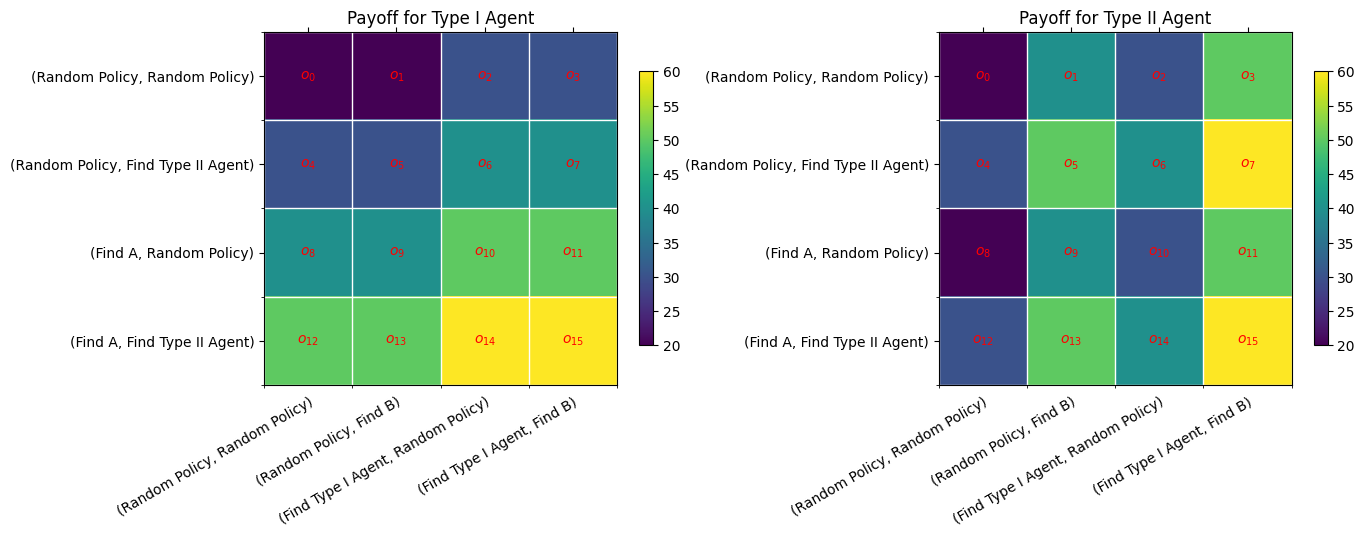

In [4]:
draw_payoff(PAYOFF_1, PAYOFF_2, LABELS_1, LABELS_2, label_outcomes=True)

**3. Nash Equilibrium**

A Nash equilibrium is a situation where every player is playing their best response to all other players.

<u>*Pure Strategy Nash Equilibrium:*</u>

The table below shows, for each strategy combination, how each player would shift their strategy to produce the best response. The blue lines are for the type I agent and the red lines are for the type II agent. For example: in the first column, if the type II agent plays (Random Policy, Random Policy), then the best response from type I agent is to play (Find A, Find Type II Agent), and they would switch from any other strategy to this strategy to obtain the highest payoff.

As you can see, for (Find A, Find Type II Agent) - (Find Type I Agent, Random Policy), the type I agent has no incentive to change its strategy as it is already playing the best response. However, the type II agent is not playing their best response to type I agent's strategy of (Find A, Find Type II Agent).

For (Random Policy, Find Type II Agent) - (Find Type I Agent, Find B), the type II agent has no incentive to change its strategy as it is already playing the best response. However, the type I agent is not playing their best response to type II agent's strategy of (Find Type I Agent, Find B).

And finally, for (Find A, Find Type II Agent) - (Find Type I Agent, Find B), both agents are playing their best response to the other's strategy and thus have no incentive to unilaterally deviate from their strategies. Thus, the nash equilibrium is when the type I agent follows the (Find A, Find Type II Agent) strategy and the type II agent follows the (Find Type I Agent, Find B) strategy.

<!-- The combination where Agent I chooses "Find A, Find Agent 2" and Agent II chooses "Find Agent 1, Find B" is a Nash Equilibrium. If Agent I is playing "Find A, Find Agent 2", Agent II's best response is "Find Agent 1, Find B". And if Agent II is playing "Find Agent 1, Find B", Agent I's best response is "Find A, Find Agent 2". Neither has an incentive to deviate unilaterally. -->
<!-- 
For a better visualisation purpose, the following heatmap is plotted to show the strategy with high payoff for all types of agents. From the heatmap value, the strategies with high payoff are the dominant strategy of the agents. Looking at the columns in Type I agent heatmap, we notice that there is incentive for Type I agent to change to the last row for better payoff whenever it is not at the last row. As for Type II agent, it has the incentive to change to the last column as long as the strategy it plays is not in the last column. With that, the only Nash Equilibrium point is bottom-right corner of the matrix. -->

![nash_equilibrium_workings](img/nash_eq_workings.PNG)

*<u> Mixed Nash Equilibrium: </u>* If we adopt a mixed strategy, in which the type II agent plays:
- (Random, Random) with some probability $q_1$
- (Random, Find B) with some probability $q_2$
- (Find Type I, Random) with some probability $q_3$
- (Find Type I, Find B) with some probability $1-q_1-q_2-q_3$

and the type I agent plays:
- (Random, Random) with some probability $p_1$
- (Random, Find Type II) with some probability $p_2$
- (Find A, Random) with some probability $p_3$
- (Find A, Find Type II) with some probability $1-p_1-p_2-p_3$

with $q_1 + q_2 + q_3 + (1-q_1-q_2-q_3) = 1$ and $p_1 + p_2 + p_3 + (1-p_1-p_2-p_3)=1$

This is visualized in the table below:

![game_theory_mixed_nash](img/game_theory_mixed_nash.PNG)



To find a mixed strategy Nash equilibirum, at least one of the two players must be playing a randomized strategy (i.e. plays all strategies with equal probabilities) and no player is able to increase their expected payoff by playing a different strategy. (ref: https://saylordotorg.github.io/text_introduction-to-economic-analysis/s17-03-mixed-strategies.html)

For such a scenario, the player playing the randomized strategy must have equal expected payoff for all their options. Thus, we begin by calculating the expected payoff for the row player (type I agent) for each strategy:

\begin{align*}
    E[\text{Payoff(Random, Random)}] = 20 \cdot q_1 + 20 \cdot q_2 + 30 \cdot q_3 + 30(1-q_1-q_2-q_3) = 30 - 10q_1-10q_2 \hspace{1cm} (1)\\
    E[\text{Payoff(Random, Find Type II)}] = 30 \cdot q_1 + 30 \cdot q_2 + 40 \cdot q_3 + 40(1-q_1-q_2-q_3) = 40 - 10q_1-10q_2 \hspace{1cm} (2)\\
    E[\text{Payoff(Find A, Random)}] = 40 \cdot q_1 + 40 \cdot q_2 + 50 \cdot q_3 + 50(1-q_1-q_2-q_3) = 50 - 10q_1-10q_2 \hspace{1cm} (3)\\
    E[\text{Payoff(Find A, Find Type II)}] = 50 \cdot q_1 + 50 \cdot q_2 + 60 \cdot q_3 + 60(1-q_1-q_2-q_3) = 60 - 10q_1-10q_2 \hspace{1cm} (4)\\
\end{align*}

If we attempt to equate any of the 4 expected payoffs, say, (1) = (2), we see that this is not possible:
\begin{align*}
    E[\text{Payoff(Random, Random)}] &= E[\text{Payoff(Random, Find Type II)}] \\
    30 - 10q_1-10q_2 &= 40 - 10q_1-10q_2 \\
    -10q_1 + 10q_1 - 10q_2 + 10q_2 &= 40-30\\
    0 &\ne 10
\end{align*}

Since all 4 equations have the coefficient $-10$ for both $q_1$ and $q_2$, and different constant values, we can easily see that regardless of the probability distribution of type II's strategies, it is impossible to formulate a scenario in which the row player (type I) will ever randomize.


Similarly, we can do the same calculation from the perspective of the column player (type II agent). We begin by calculating the expected payoff for the column player for each strategy:

\begin{align*}
    E[\text{Payoff(Random, Random)}] = 20 \cdot p_1 + 30 \cdot p_2 + 20 \cdot p_3 + 30(1-p_1-p_2-p_3) = 30 - 10p_1-10p_3 \hspace{1cm} (5)\\
    E[\text{Payoff(Random, Find B)}] = 40 \cdot p_1 + 50 \cdot p_2 + 40 \cdot p_3 + 50(1-p_1-p_2-p_3) = 50 - 10p_1-10p_3 \hspace{1cm} (6)\\
    E[\text{Payoff(Find Type I, Random)}] = 30 \cdot p_1 + 40 \cdot p_2 + 30 \cdot p_3 + 40(1-p_1-p_2-p_3) = 40 - 10p_1-10p_3 \hspace{1cm} (7)\\
    E[\text{Payoff(Find Type I, Find B)}] = 50 \cdot p_1 + 60 \cdot p_2 + 50 \cdot p_3 + 60(1-p_1-p_2-p_3) = 60 - 10p_1-10p_3 \hspace{1cm} (8)\\
\end{align*}

If we attempt to equate any of the 4 expected payoffs, say (5) = (6), we see that this is not possible:

\begin{align*}
    E[\text{Payoff(Random, Random)}] &= E[\text{Payoff(Random, Find B)}] \\
    30 - 10p_1-10p_3 &= 50 - 10p_1-10p_3 \\
    -10p_1 + 10p_1 - 10p_3 + 10p_3 &= 50-30\\
    0 &\ne 20
\end{align*}

Since all 4 equations have the coefficient $-10$ for both $p_1$ and $p_3$, and different constant values, we can easily see that regardless of the probability distribution of type I's strategies, it is impossible to formulate a scenario in which the column player (type II) will ever randomize.

Therefore, with the current formulation, this game does not have a mixed strategy Nash equilibrium.

### Summary

From the above analysis, we can see that the pareto optimal outcome is when the type I agent follows *(Find A, Find Type II Agent)* and type II agent follows *(Find Type I Agent, Find B)*. If they were to play some other strategy combination, each player would be motivated to play their best response, i.e. the one which gives them the highest payoff given the other player's strategy, and from the Nash equilibrium table, we can see that this will always lead to the *(Find A, Find Type II Agent)-(Find Type I Agent, Find B)* strategy combination and since this combination results in the highest payoff for both agents: (60,60), there would be no reason for either agent to deviate unilaterally from this behaviour. Thus, the pareto optimal outcome matches with the nash equilirbium so it is reasonable to expect that the agents' behaviours would converge to this strategy combination. 

In effect what this means is that the solution the model would converge on is when the type I agent takes the shortest path to location A to pick up the item, then both type I and II agents take the shortest path to each other (i.e. meet at an efficient handover point), and then the type II agent would take the shortest path to B. This would incur the least movement penalty and thus the highest payoff. 

We can see that this matches our results and analysis of the best model from the implementation (see 2. Documentation). We see that for the model which achieves near 0 loss, the q-values of the DQN model for the type I agents strongly point the agent directly towards location A ([0,0]) to pick up the item, and for the handover stage, we see that the q-values of the DQN for both the type I and II agents direct it towards an efficient handover point *between* the two agents. Finally, once the type II agent has the item, the q-values of the DQN are highest directly on location B and thus it makes a beeline towards location B ([grid_size-1,grid_size-1]).

# Evolutionary Game Theory

![combination.png](img/combination.png)

Other than the classic game theory, we can model the game into using Evolutionary Game Theory as the agents are learning to switch between different strategies to find the best one for accomplishing the task.

To model the game using evolutionary game theory, we have to reduce the dimensionality of the payoff matrix for simplicity. As visualized above, it can be done by separating the behaviour of an agent into 2 groups: Cooperation and Defection (or Coop and Defect for short).

- Coop means the agent would act strategically to achieve the goal using the minimum number of steps
- Defect means the agent would act randomly and may not achieve the goal in the most efficient manner.

Using the above idea, we can construct a $2\times 2$ payoff matrix with the following rules.
1. **Defect, Defect (Both act randomly for at least one target):**
Looking at the first matrix, when both agents adopt the "Random Policy" strategy for *at least one of their targets*, we get sub-optimal payoff values. This represents mutual defection.

$\text{Type I Average} = (20+20+30+30+30+40+40+40+50)/9 = 33.33$

$\text{Type II Average} = (20+40+30+30+50+40+20+40+30)/9 = 33.33$

$\text{(Type I Average, Type II Average)} = (33.33, 33.33)$

2. **Defect, Coop (Type I defects while Type II cooperates):**
This represents the strategy combinations in which the type I agent adopts a random policy for at least one of its targets whereas the type II agent performs optimally for both tasks. Note that even though the type II agent behaves optimally, it does not always mean that the type II agent will get the maximum payoff, because the handover depends on the behaviour of both agents.

$\text{Type I Average} = (30+40+50)/3 = 40$

$\text{Type II Average} = (50+60+50)/3 = 53.33$

$\text{(Type I Average, Type II Average)} = (40, 53.33)$

3. **Coop, Defect (Type I cooperates while Type II defects):**
This represents the strategy combinations in which the type II agent adopts a random policy for at least one of its targets whereas the type I agent performs optimally for both tasks. Note that even though the type I agent behaves optimally, it does not always mean that the type I agent will get the maximum payoff, because the handover depends on the behaviour of both agents.

$\text{Type I Average} = (50+50+60)/3 = 53.33$

$\text{Type II Average} = (30+50+40)/3 = 40$

$\text{(Type I Average, Type II Average)} = (53.33, 40)$

4. **Coop, Coop (Both cooperate):**
This is when both agents performs optimally for both of their targets. This can be directly taken as Type I adopting "Find A, Find Agent II" and Type II adopting "Find Agent I, Find B", which results in the payoff:

$\text{(Type I Average, Type II Average)} = (60,60)$

![evolution_stability.png](img/evolution_stability.png)

As you can immediately see, when both agents defect the payoff is very small, and when one agent defects and the other cooperates, the payoff is higher although still not optimal with the cooperative agent having a slightly higher payoff than the uncooperative agent. Finally, as expected when both agents cooperate, both agents receive the highest payoff.

## Simplifications / Abstractions Made
*Note: the same simplifications made for the $4\times4$ table applies here as well*

1. Diverse behaviours are grouped very broadly into just 4 groups, Defect-Defect, Defect-Coop, Coop-Defect, Coop-Coop
2. Evolutionary model is heavily simplified with reproduction and mutation being replaced by the probability of agents switching strategy.
3. Payoff for each strategy is oversimplified by taking the average of the payoff values across the strategy combinations within each group from the $4 \times 4$ matrix.

## Limitations and Implications
1. Although simplification 1 reduces the dimensionality of the matrix, it inevitably loses information for detailed analysis when agent plays suboptimal strategy (at least one random), because all of these behaviours get grouped together.
2. Using the evolutionary framework with mere transition probability in strategies would limit its use case and may produce unexpected behaviour of the model due to oversimplified mutation and reproduction rate with uniform probability.
3. Since the Defect-Defect group particularly encompasses a vast array of behaviours, simplifying all the possible resulting payoffs with a single value is likely to be quite inaccurate for a large portion of these sub-optimal behaviours.


### Payoff Matrix Analysis

Before delving into evolutionary game theory, we could analyse the payoff matrix using classical game theory to have a better understanding on the scenario.

1.  **<u> Dominant Strategy Analysis: </u>**

**For Type I:**

if Type II defects, Type I gets a payoff of 33.33 by defecting and 53.33 by cooperating. Therefore, cooperating is better.
If Type II cooperates, Type I gets a payoff of 40 by defecting and 60 by cooperating. Again, cooperating is better.
So, Type I has a dominant strategy to cooperate.

**For Type II:**

If Type I defects, Type II gets a payoff of 33.33 by defecting and 53.33 by cooperating. Therefore, cooperating is better.
If Type I cooperates, Type II gets a payoff of 40 by defecting and 60 by cooperating. Again, cooperating is better.
So, Type II also has a dominant strategy to cooperate.

Referring to the heatmap below, it is clear that cooperate is the best response for both types of agents under all scenarios.


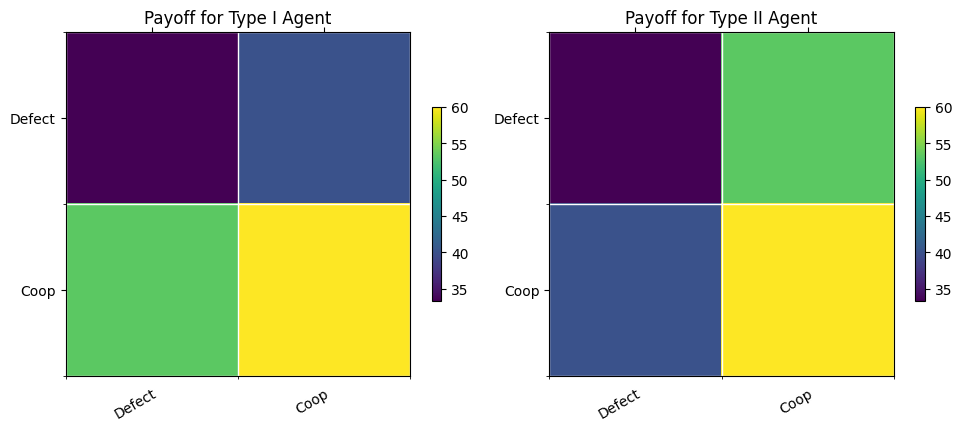

In [ ]:
PAYOFF_1S = np.array([[33.33, 40],
                    [53.33, 60]])
PAYOFF_2S = np.array([[33.33, 53.33],
                    [40, 60]])
LABELS_S = ["Defect", "Coop"]
draw_payoff(PAYOFF_1S, PAYOFF_2S, LABELS_S, LABELS_S, figsize=(10, 10))

2. **<u> Pareto Optimal: </u>**

Refer to the heatmaps below for the annotation of the outcomes

For type I agent: outcome $o_3$ clearly has the highest payoff which is strictly greater than the payoff for all other outcomes.

For type II agent: outcome $o_3$ also has the highest payoff which is strictly greater than the payoff for all other outcomes.

For both type I and II agent: outcome $o_3$ has the highest payoff for both agents, there is no other outcome which is at least as good as $o_3$ and none of the agents strictly prefer another outcome to $o_3$. Thus, no other outcome pareto dominates $o_3$ and we can say that **$o_3$ is the Pareto Optimal outcome**.


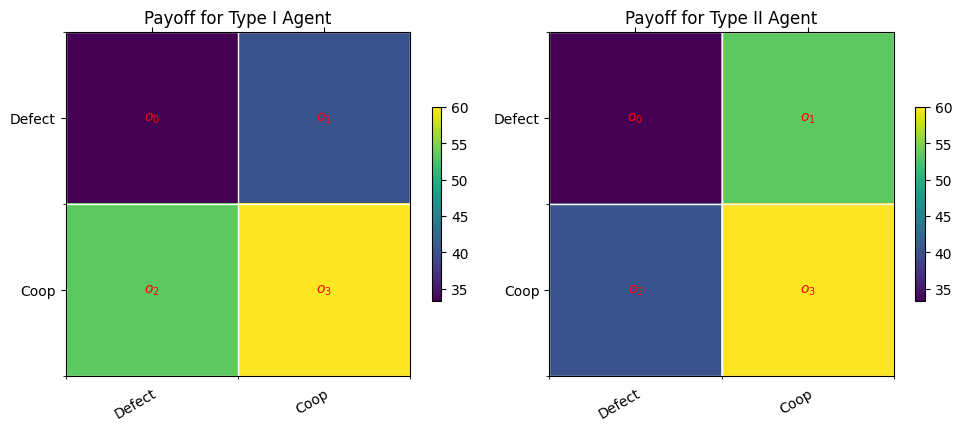

In [8]:
draw_payoff(PAYOFF_1S, PAYOFF_2S, LABELS_S, LABELS_S, figsize=(10, 10), label_outcomes=True)

3. **<u> Nash Equilibrium: </u>**

- **Pure Strategy Nash Equilibrium Analysis:**

Type I agent: regardless of whatever strategy is adopted by the type II agent, the best response from the type I agent is to play "Coop".

Type II agent: regardless of whatever strategy is adopted by the type I agent, the best response from the type II agent is to play "Coop".

Therefore, **(Coop, Coop) which has the highest payoff of (60,60) is the Nash equilibrium** because each player is playing their best response and no agent has an incentive to unilaterally deviate from their strategies

- **Mixed Strategy Nash Equilibrium Analysis:** For mixed strategy Nash equilibrium, players randomize their strategies such that they are indifferent between their available actions.

    - (Type II Defect) with some probability $q_1$
    - (Type II Coop) with some probability $1-q_1$
    - (Type I Defect) with some probability $p_1$
    - (Type I Coop) with some probability $1-p_1$

    with $q_1 + (1-q_1) = 1$ and $p_1 + (1-p_1)=1$
  
![evolution_stability_mixednash](img/evolution_stability_mixednash.png)

For such a scenario, the player playing the randomized strategy must have equal expected payoff for all their options. Thus, we begin by calculating the expected payoff for the row player (type I agent) for each strategy:

\begin{align*}
    E[\text{Payoff(Type I Defect)}] = 33.33 \cdot q_1 + 40(1-q_1) = 40 - 6.67q_1 \hspace{1cm} (9)\\
    E[\text{Payoff(Type I Coop)}] = 53.33 \cdot q_1 + 60(1-q_1) = 60 - 6.67q_1 \hspace{1cm} (10)\\
\end{align*}

If we attempt to equate the 2 expected payoffs, (9) = (10), we see that this is not possible:
\begin{align*}
    E[\text{Payoff(Type I Defect)}] &= E[\text{Payoff(Type I Coop)}] \\
    40 - 6.67q_1 &= 60 - 6.67q_1 \\
    -6.67q_1 + 6.67q_1 &= 60-40\\
    0 &\ne 20
\end{align*}

We can easily see that regardless of the probability distribution of type II's strategies, it is impossible to formulate a scenario in which the row player (type I) will ever randomize.


Similarly, we can do the same calculation from the perspective of the column player (type II agent). We begin by calculating the expected payoff for the column player for each strategy:

\begin{align*}
    E[\text{Payoff(Type II Defect)}] = 33.33 \cdot p_1 + 40(1-p_1) = 40 - 6.67p_1 \hspace{1cm} (11)\\
    E[\text{Payoff(Type II Coop)}] = 53.33 \cdot p_1 + 60(1-p_1) = 60 - 6.67p_1 \hspace{1cm} (12)\\
\end{align*}

If we attempt to equate the 2 expected payoffs, (11) = (12), we see that this is not possible:

\begin{align*}
    E[\text{Payoff(Type II Defect)}] &= E[\text{Payoff(Type II Coop)}] \\
    40 - 6.67p_1 &= 60 - 6.67p_1 \\
    -6.67p_1 + 6.67p_1 &= 60-40\\
    0 &\ne 20
\end{align*}

We can easily see that regardless of the probability distribution of type I's strategies, it is impossible to formulate a scenario in which the column player (type II) will ever randomize.

Therefore, with the current formulation, this game does not have a mixed strategy Nash equilibrium.

**To summarize, both Type I and Type II have a dominant strategy to Cooperate. The outcome where both cooperate (60, 60) is both Pareto Optimal and a Nash Equilibrium. This suggests that in this game, mutual cooperation is the most favourable and stable outcome for both players. We reach the same conclusion as in the $4 \times 4$ matrix above.**

### Evolutionary Game Analysis

- Individual-based Analysis over Time

Note that using the $4 \times 4$ payoff matrix, we can simulate the proportion of the Type I agent using the following formula.

\begin{equation*}
    p_{t+1} = \frac{p_tW_1}{p_tW_1 + (1-p_t)W_2}
\end{equation*}
where $p$ is the proportion of Type I agent in the population and $W$ is the average payoff of Type I agent and formulated as below.
\begin{equation*}
    W_s = x^TA_sy
\end{equation*}
where $x$ is the probability of selecting Type I strategies, $A_s$ is the payoff of agent type $s$ and $y$ is the probability of selecting Type II strategies.

Using the above formula, we can simulate the proportion of Type I agent within the population over the time. The following shows the results of the above calculation using random policy for both Type I agent and Type II agent.

- Average payoff of Type I = Average payoff of Type II if both of them using random policy
- The proportion stays the same through out the time due to same average payoff for both Type I and Type II agents.

However, do note that the above formula would be fully dependent on the average payoff of the agents and is not a good indicator of how the agents would evolve throughout the time. We could notice that the equilibrium point occurs when the average payoff of the agents are the same. If one is dominated by the others, over the time, the whole population would be diminished. Furthermore at the equilibrium point, when the payoff for being a type I vs type II agent is equal, then the actual numbers of agents of both types do not matter and remains constant throughout (this is what you see in the graph below). This model disregards a critical point of the game -- that a pair of type I and II agents are required to complete the game, thus even if we have 5000 type I agents and 2 type II agents, the maximum payoff is bounded by the 2 type II agents (because in our implementation once a type II agent finishes its task, it is removed from the game). Thus, such an model does not accurately represent the details of the task and with that, this model does not provide any value in exploring the learning of the agents throughout the time.

In [13]:
p1 = 0.25   # proportion of Agent 1 in the beginning

# equal chance of playing all strategies in the beginning
STRATEGY_1 = np.array([[0.25, 0.25, 0.25, 0.25]]).T
STRATEGY_2 = np.array([[0.25, 0.25, 0.25, 0.25]]).T

# calculate average payoffs for both type I and type II agents
W1 = (STRATEGY_1.T @ PAYOFF_1 @ STRATEGY_2)[0][0]
W2 = (STRATEGY_1.T @ PAYOFF_2 @ STRATEGY_2)[0][0]

print('AVG_PAYOFF_1', W1)
print('AVG_PAYOFF_2', W2)

AVG_PAYOFF_1 40.0
AVG_PAYOFF_2 40.0


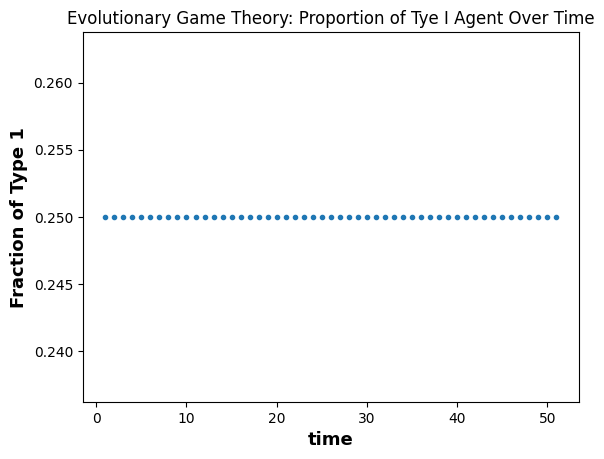

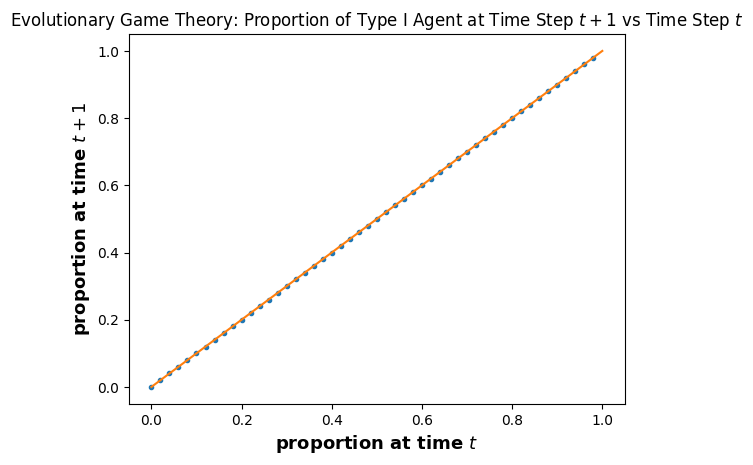

In [15]:
def play_one_gen(p):
    """
        Play one generation of evolution on the population and get the proportion of 
        type one population in next generation.

    Args:
        p: Proportion of Type I population.
    """
    p_nxt_gen = (p * W1) / ((p * W1) + (1 - p)*W2)
    return p_nxt_gen

def play(generation = 50):
    """
        Play one evolution game on the population, and return the history of 
        type one population proportion.

    Args:
        generation: Number of generation of evolution.
    """
    history = [p1]

    for _ in range(generation):
        prev_p1 = history[-1]
        history.append(play_one_gen(prev_p1))

    return history

def plot_fractions(history):
    """
        Plot the history of population over time.

    Args:
        history: History of population proportion.
    """
    x = range(1,1+len(history))
    y = history
    fig, ax = plt.subplots()
    ax.set_xlabel('time', fontsize=13,fontweight="bold")
    ax.set_ylabel('Fraction of Type I', fontsize=13,fontweight="bold")    
    plt.title('Evolutionary Game Theory: Proportion of Tye I Agent Over Time')
    plt.plot(x, y,".")
    plt.show()

def plot_propotion_timestep(proportion_no = 50):
    """
        Plot the relationship between the proportion of type population at
        time step t and time step (t+1), using replicator dynamics.

    Args:
        proportion_no: Number of proportions to plot
    """
    x = []
    y = []

    for i in range(proportion_no):
        p = i /proportion_no

        x.append(p)
        y.append(play_one_gen(p))

    fig, ax = plt.subplots()
    ax.set_xlabel('proportion at time $t$', fontsize=13,fontweight="bold")
    ax.set_ylabel('proportion at time $t+1$', fontsize=13,fontweight="bold")   
    plt.title('Evolutionary Game Theory: Proportion of Type I Agent at Time Step $t+1$ vs Time Step $t$')
    plt.plot(x, y,".")

    bobo = [0, 1]
    plt.plot(bobo, bobo)

    plt.show()

history = play()
plot_fractions(history)
plot_propotion_timestep()


- Agent Payoff Analysis based on Probability of Cooperation

Instead of using $4 \times 4$ matrix, we decide to use a simple $2 \times 2$ model for conducting the analysis. Note that this is a form of mixed strategy analysis to investigate how the probability of cooperation would affect the payoff of each agent using different strategies.

The first graph depicts the rewards for both Type I and Type II agents based on the probability of Type I cooperating (ranging from 0, meaning never cooperates, to 1, meaning always cooperates). The graph showcases four lines:

1. Reward for Type I when Type II purely cooperates.

2. Reward for Type II when Type II purely cooperates.

3. Reward for Type I when Type II purely defects.

4. Reward for Type II when Type II purely defects.

The second graph depicts the rewards for both Type I and Type II agents based on the probability of Type II cooperating (ranging from 0, meaning never cooperates, to 1, meaning always cooperates). The graph showcases four lines:

1. Reward for Type I when Type I purely cooperates.

2. Reward for Type II when Type I purely cooperates.

3. Reward for Type I when Type I purely defects.

4. Reward for Type II when Type I purely defects.

We can see that the payoff for each agent increases with the probability of playing cooperation strategy.  On the other hand, we can notice that the highest payoff is attained only when both players play the cooperation strategy. This matches the conclusion reached with the analysis of both the $4\times4$ and $2\times2$ matrices above. With that, the agents should learn to be cooperative over time in order to maximize their rewards, aligning with the design of reward structure in Reinforcement Learning algorithm in section I and II.

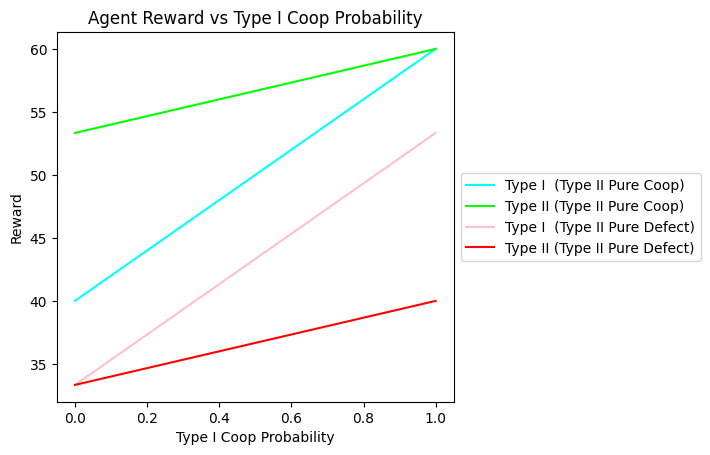

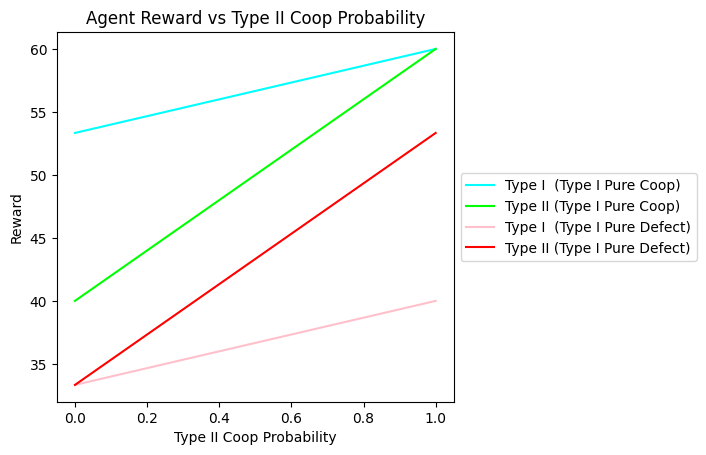

In [17]:
def plot_evo_stability(payoff_1, payoff_2, type=1):
    """
        Observe the evolution stability between 2 population.

    Args:
        payoff1: Payoff matrix for Type I.
        payoff2: Payoff matrix for Type 2.
        type: Population type that exercise mixed strategy.
    """
    fig = plt.figure()
    ax  = plt.subplot(111)

    x_axis = [0, 1]

    if type == 1:
        ax.plot(x_axis, [payoff_1[0][1], payoff_1[1][1]], label = 'Type I  (Type II Pure Coop)', color = 'cyan')
        ax.plot(x_axis, [payoff_2[0][1], payoff_2[1][1]], label = 'Type II (Type II Pure Coop)', color = 'lime')
        ax.plot(x_axis, [payoff_1[0][0], payoff_1[1][0]], label = 'Type I  (Type II Pure Defect)', color = 'pink')
        ax.plot(x_axis, [payoff_2[0][0], payoff_2[1][0]], label = 'Type II (Type II Pure Defect)', color = 'red')

        plt.xlabel('Type I Coop Probability')
        plt.title('Agent Reward vs Type I Coop Probability')
    elif type == 2:
        ax.plot(x_axis, [payoff_1[1][0], payoff_1[1][1]], label = 'Type I  (Type I Pure Coop)', color = 'cyan')
        ax.plot(x_axis, [payoff_2[1][0], payoff_2[1][1]], label = 'Type II (Type I Pure Coop)', color = 'lime')
        ax.plot(x_axis, [payoff_1[0][0], payoff_1[0][1]], label = 'Type I  (Type I Pure Defect)', color = 'pink')
        ax.plot(x_axis, [payoff_2[0][0], payoff_2[0][1]], label = 'Type II (Type I Pure Defect)', color = 'red')

        plt.xlabel('Type II Coop Probability')
        plt.title('Agent Reward vs Type II Coop Probability')

    plt.ylabel('Reward')


    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

    # Put a legend to the right of the current axis
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    plt.show()


plot_evo_stability(PAYOFF_1S, PAYOFF_2S, type=1)
plot_evo_stability(PAYOFF_1S, PAYOFF_2S, type=2)


- Population-based Analysis

Using the average payoff calculated in previous section, we can create yet another payoff matrix that decides the role of Type I agent and Type II agent as shown below. Additionally, we can use the single payoff from the perspective of Type I agent in determining the behaviour stability under various scenarios. This matrix is claimed to be action payoff as shown below.

#### Population Payoff

![population_payoff.png](img/population_payoff.png)

To get a 2x2 population payoff matrix from the given 4x4 matrix, we'll calculate the average payoff for each combination of Type I and Type II which is done above.

**Type I average payoff:** 40
 (Refer to the formula below).

**Type II average payoff:** 40
(Refer to the formula below).

**Type I & Type II:**
Average: $(40+40)/2 = 40$

When there is only Type I agent or Type II agent, the payoff is set to be 0 as the task could not be accomplished without one of them.

In [18]:
# equal chance of playing all strategies in the beginning
STRATEGY_1 = np.array([[0.25, 0.25, 0.25, 0.25]]).T
STRATEGY_2 = np.array([[0.25, 0.25, 0.25, 0.25]]).T

# calculate average payoffs for both type I and type II agents
W1 = (STRATEGY_1.T @ PAYOFF_1 @ STRATEGY_2)[0][0]
W2 = (STRATEGY_1.T @ PAYOFF_2 @ STRATEGY_2)[0][0]

print('AVG_PAYOFF_1', W1)
print('AVG_PAYOFF_2', W2)

AVG_PAYOFF_1 40.0
AVG_PAYOFF_2 40.0


### Action Payoff

From the $2 \times 2$ matrix described in previous section, extracting out the payoff from Type I agent perspective would yield the values shown in the table below.

#### Action Payoff (from Type I/II Agent Perspective (i.e. as the row player))
*NOTE: since the $2\times2$ payoff matrix is symmetrical, both type I and II agents have the same payoff matrix if we set them as the row player*
![action_payoff_2x2_typeI](img/action_payoff_typeI.png)

Using the above matrices with the replicator dynamics formula adapted from Week 7 slides, we can construct the simulation as follows.

\begin{align*}
    \hat{x_i} &= x_i((Ax)_i - x^TAx) \\
    x_{t+1} &= p(1 + \text{learn\_rate} * x_t)
\end{align*}
where $\hat{x_i}$ is the growth rate of the population, $x_t$ is the proportion of the population in the current round, and $x_{t+1}$ is the proportion of the population in the next round.

The following graphs depict the results from the analysis.

In [29]:
POPULATION_PAYOFF = np.array([[0, 40],  # For Type 1 vs Type 2
                              [40, 0]])

ACTION_PAYOFF = np.array([[33.33, 40], # For Defect vs Coop
                          [53.33, 60]])

LEARN_RATE = 0.1

def play_one_gen(p, A):
    """
        Play one generation of game on replicator dynamics, then estimate the proportion
        of type 1 population at next round. 

    Args:
        p: Proportion of type 1 population.
        A: Payoff matrix.
    """
    x = np.array([[p, 1-p]]).T
    # Week 7 Population Game - Slide 40 - Replicator Equation n = 2
    x_1 = x[0][0]*((A@x)[0][0] - (x.T @ A @ x)[0][0])   # Rate of change of type 1 population
    x_2 = x[1][0]*((A@x)[1][0] - (x.T @ A @ x)[0][0])   # Rate of change of type 2 population

    x1_nxt_round_p = p*(1+x_1*LEARN_RATE)        
    x2_nxt_round_p = (1-p)*(1+x_2*LEARN_RATE)

    res = x1_nxt_round_p/(x1_nxt_round_p + x2_nxt_round_p)

    return res


def plot_propotion_timestep(A, proportion_title, time_step = 100):
    """
        Plot the relationship between the proportion of type population at
        time step t and time step (t+1), using evolutionary game theory.

    Args:
        p: Proportion of type 1 population.
        A: Payoff matrix.
    """
    x = []
    y = []

    for i in range(time_step):
        p = i/time_step

        x.append(p)        # p = Proportion of Type 1 (A) / Probability to Defect (B) 
        y.append(play_one_gen(p, A))

    fig, ax = plt.subplots()
    ax.set_xlabel('time $t$', fontsize=13,fontweight="bold")
    ax.set_ylabel('time $t+1$', fontsize=13,fontweight="bold")  
    plt.title(f'Evolutionary Game Theory (Replicator Dynamics): Proportion of {proportion_title} at Time Step $t+1$ vs Time Step $t$')
    plt.plot(x, y,".")

    bobo = [0, 1]
    plt.plot(bobo, bobo)
    plt.show()


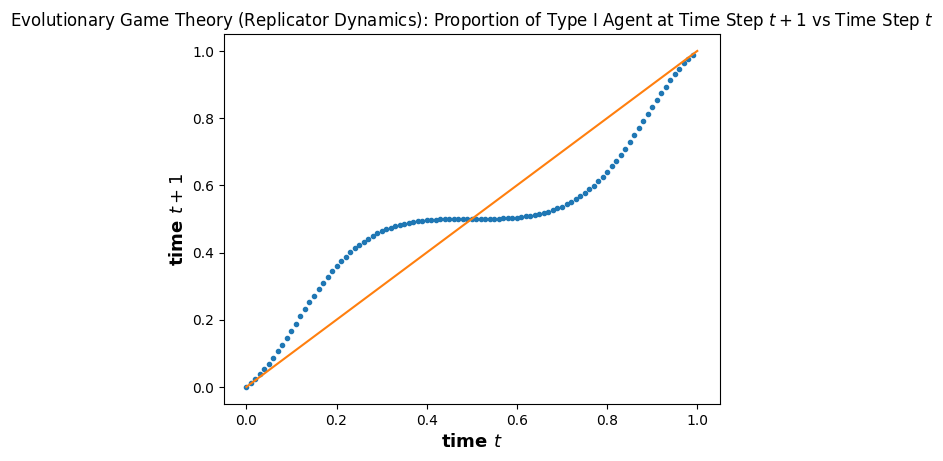

In [30]:
plot_propotion_timestep(POPULATION_PAYOFF, proportion_title="Type I Agent")

**Adaptive Behavior:**

The dynamics portrayed by the blue dots reveal an adaptive behavior in the population. Depending on which strategy or type has a higher relative payoff, the population shifts its proportions to increase the prevalence of the more successful strategy or type. In fact, it is shifting towards p = 0.5 which is the equilibrium state.

**Stability and Instability Regions:**

Areas where the blue dots closely follow if not intersects the orange line are regions of stability. Small changes in proportions lead to minimal shifts in the next generation. This is indicated as the 3 points in the graph, i.e. (0, 0), (1, 1) and (0.5, 0.5). In contrast, regions where the blue dots deviate significantly from the orange line are unstable. Here, even slight changes in proportions can result in significant shifts in the next generation. For replicator equation n=2, the equilibrium shows **stable coexistence**, Type 1 Agent & Type 2 Agent should coexist with proportion of 50% each.

![eq_coexistence](img/stable_coexistence.png)

**Equilibrium**
Interpretation in the Population Game: At p=0.5, both types of agent are equally represented in the population. No agent type has an inherent advantage over the other. If the proportion of one agent (i.e Type I Agent) is slightly more than 0.5, then over time, the proportion will decrease back to 0.5. Conversely, if the proportion of Type II Agent is slightly less than 0.5, it will increase back to 0.5 over time.

In essence, any deviation from the p=0.5 balance will correct itself, with the proportion of strategies gravitating back toward this equilibriu From the graph, we can clearly see that the blue dots are more compact around p=0.5m.

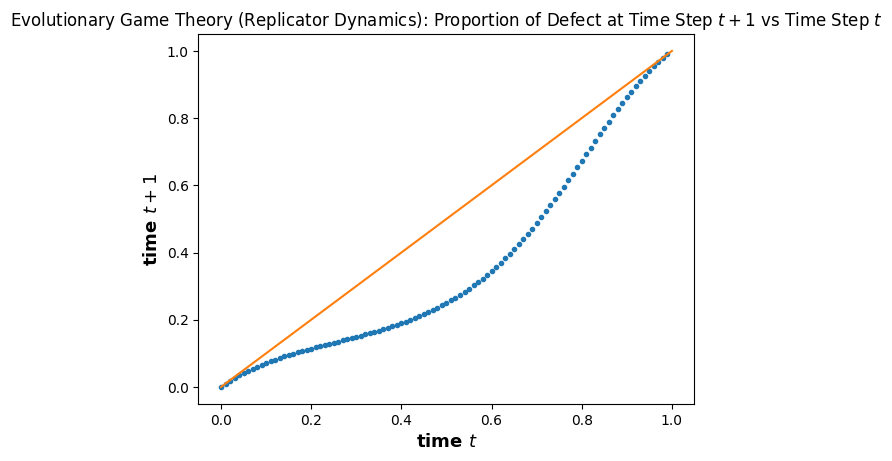

In [31]:
plot_propotion_timestep(ACTION_PAYOFF, proportion_title="Defect")

We can see that the defect probability decreases quite a bit from time $t\rightarrow t+1$, for ex: if at time $t$, the proportion of agents choosing "defect" is 0.4, at the next time step, $t+1$, only <0.2 of the agents will choose "defect". Consequently, the proportion of "Coop" strategies in the population is increasing from time $t\rightarrow t+1$ . This is because as we have mentioned several times already, the best response for both players is "Coop", which always leads to a higher payoff.

For an agent meeting a defector: Cooperating (53.33) yields a higher payoff than defecting (33.33). Thus, based on this, if many agents in the population are defecting, there's an incentive for an agent to cooperate.

For an agent meeting a cooperator: Cooperating (60) yields a higher payoff than defecting (40). This reinforces the notion that cooperation is beneficial.

1. **Stable States & Convergence:**
The curve is below $y=x$ and will converge to $p=0$ in the replicator dynamics graph, it means the population will ultimately adopt the "Coop" strategy.
Given our matrix, this makes sense. "Coop" has a higher payoff against both defectors and cooperators compared to "Defect." So, over time, as agents adjust their strategies based on the payoffs they observe, the proportion of "Coop" strategies in the population should increase. If everyone starts by defecting, and some random mutations or changes cause some individuals to switch to cooperating, those cooperators would fare better on average than the defectors. Over time, this would cause the proportion of cooperators to increase.

2. **Equilibrium:**
An equilibrium in the context of replicator dynamics is a state where the proportions of strategies in the population do not change. This could be because one strategy completely dominates (like "Coop" in our case) or because there's a stable mix of strategies. In the given matrix, the dynamics push the population towards mutual cooperation. Thus, "Coop, Coop" is both a Nash Equilibrium and would be a stable state in the replicator dynamics, given the payoffs. For replicator equation n=2, the equilibrium shows **dominance**, Coop Action dominates Defect Action.

![eq_dominance](img/dominance.png)

In conclusion, the replicator dynamics based on this payoff matrix suggest that cooperation will be the dominant strategy in the long run. This is because cooperation offers higher rewards for players compared to defecting, regardless of the opponent's strategy.

- Evolutionary Stability Analysis

From the game theory perspective, we have the following payoff matrix.

![payoff_matrix](img/evolution_stability.png)

We can transform it into the evolutionary perspective as shown below.

Let $p$ be the proportion of the population using the cooperation strategy, let blue dots be the payoff of the cooperation strategy and red dots be the payoff of the defect strategy. Using this, we can construct the following graph.

*Note that when there is not cooperation, the payoff for being coop is 0 since there is no one helping you to accomplish the task together. When the proportion of population playing cooperation increases, the payoff would increase on average since majority would still be playing defect and ignore the need to help those playing cooperation strategy until the point when majority plays cooperation strategy. On the other hand, players playing defect would always have a fixed payoff regardless of what the population is doing as it could still achieve the task, at a slower rate. Integrating the information into the graph yields the following result.*

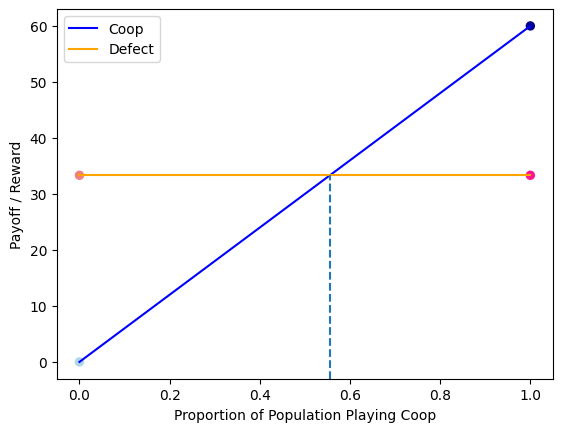

In [39]:
def plot_stability_graph(coop_payoff, defect_payoff):
    fig, ax = plt.subplots()

    # NOTE: Assume first element in payoff is at p=0
    y = [*coop_payoff, *defect_payoff]
    x = [0, 1, 0, 1]
    c = ['lightblue', 'darkblue', 'lightcoral', 'deeppink']

    ax.scatter(x, y, c=c, s=33.33)
    ax.plot([0, 1], coop_payoff, c='blue', label='Coop')
    ax.plot([0, 1], defect_payoff, c='orange', label='Defect')
    ax.axvline(x=5/9, ymin=0, ymax=0.55, linestyle='--')
    ax.set_xlabel('Proportion of Population Playing Coop')
    ax.set_ylabel('Payoff / Reward')
    ax.legend()
    plt.show()

plot_stability_graph((0, 60), (33.33, 33.33))

Following the above visualisation, we can deduce the analysis as follows. There are 3 stability points at $p=0$, $p=\frac{5}{9}$, $p=1$ as indicated in the graph.

- At $p = 0$

If 1\% of the population suddenly changes to defect in a world filled with coop, $p=0.99$, then we note that following the coop strategy would yield a much higher payoff then being defect. Hence, the agents would stay to coop and those following defect would slowly disappear. This shows that the coop strategy is evolutionarily stable.

- At $p = 1$

If 1\% of the population suddenly changes to coop in the world filled with defect, $p=0.01$, we notice that the defect strategy yields better payoff and hence the agents would stick to defect strategy. This is yet another equilibrium state.

- At $p = \frac{5}{9}$

Both coop and defect strategies, as shown above are resistant to alternative strategy according to the graph. When $\frac{5}{9}$ if the population follows coop strategy, the payoff for both groups, on average, would be the same (indicated as intersection point in the graph). With that, at state $p = \frac{5}{9}$, it is unchanged and become an equilibrium.

## Comparison of Game Theoretic Analysis with Reinforcement Learning Method (DQN Implementation)

Following the analysis above, it is suggested that the agents' behaviour is expected to converge. However, the solution that they converge might vary based on the analysis approach.

**Game Theoretical Approach**
- Classical Game Theory

In the context of classical game theory, the agent should converge to either Pareto Optimal solution or Nash Equilibrium solution. Based on the model devised above, both Pareto optimal solution and Nash equilibrium solution are the same, i.e. both types of agents should play strategically to complete their subtask in minimum number of steps and be cooperative to accomplish the task together in the desired sequence

\begin{equation*}
    \text{Pick Up Item at A} \rightarrow \text{ Handover at an *efficient* Location } \rightarrow \text{ Deliver Item to B}
\end{equation*}

This solution is expected as it yields the maximum payoff and is the most rational choice. Following the analysis, the agents would have no incentive for switching the strategy once they are in this particular solution. Not to mention the solution is mutually beneficial for both types of agent.

On the other hand, there is no mixed strategy of Nash equilibrium found from the calculation except p = 1 for cooperation strategy (which is indeed the Pure Strategy Nash Equilibrium). This suggest that the agent should and only converge to 1 particular solution, i.e. cooperate with each other and play strategically to achieve the subtask within minimum number of steps.

- Population Dynamics with Evolution

In the context of population and evolutionary game theory, there exists evolutionarily equilibrium point at $p=0$, $p=\frac{5}{9}$ and $p=1$ for p being the proportion of the population following the coop strategy. This suggests the potential for convergence to cooperation. However, it is sensitive to initial conditions.

On the other hand, it is noted that as p, being the probability of playing coop for both Type I and Type II agent, increases, the maximum payoff is attained at $p = 1$. With that, the maximum payoff is only rewarded when both type of agents playing cooperation strategy. This suggests the convergence to cooperation as long as the agents are individually rationale.

To further support the conclusion of convergence, population dynamics simulation is analysed. The result shows that the population would converge to half of Type I agents and half of Type II agents. This is for high efficiency in collaboration for completing the task in desired sequence. Other than that, it is also shown that the strategy selected by agent would slowly converge to cooperation strategy to maximize the payoff within the population.

With that, it is assured that the behaviour of the agents are expected to converge to cooperation strategy.

**Reinforcement Learning Approach**
- Deep Q-Network framework

Deep Q's learning process is driven by exploration and exploitation. During the early stages, agents may struggle to learn an optimal policy due to limited understanding of the environment. However, once they explore and learn, they converge to a more efficient strategy. Under this context, type I agent would learn the policy that drives it towards location A with minimum number of steps, then head towards the efficient handover point, while type II agent would learn the policy that drives it towards the efficient handover point (taking into account of number of steps that type I agent requires to reach location A) followed by directing it to location B with minimum number of steps.

From the results obtained in DQN training, it is noted that the agents would converge to taking minimum number of steps to fixed location A and B with a somewhat sub-optimal policy to efficient handover point (highest Q-value for type I agent during handover stage is location B which is rarely the most efficient handover point), which might not align with the theoretically optimal solution derived from game theory. This is a limitation of DQN as it might not guarantee convergence to the global optimum. Nevertheless, on a macroview, they are converging to the same solution which is taking the most efficient approach by collaborating with each other to accomplish the task in desired manner.

\begin{equation*}
    \text{Pick Up Item at A} \rightarrow \text{ Handover at efficient or sometimes sub-optimal Location } \rightarrow \text{ Deliver Item to B}
\end{equation*}

Using the existing reward structure, there is no doubt that reward maximization leads to convergence of cooperation between agents in accomplishing the task. 

<!-- This result is aligned with game theoretic analysis. Nevertheless, since there is no spatial analysis in game theoretic analysis,  -->

<!-- there is minor difference such that DQN approach would diverge from the game theoretic analysis, i.e. instead of finding Type I or Type II agent, the agents would head towards the handoff point instead. Such nuance could not be captured in theoretical framework used in Game Theory without spatial configurations. -->


**Comparative Merits**

- Game theory provides a theoretical framework to predict equilibrium outcomes and strategic choices which can offer insights into the rational behaviour of agents. It's particular useful for understanding broad equilibrium properties of the system. On the other hand, DQN provides a data-driven, empirical approach to understanding agent behaviour in complex, dynamic environments. It can capture nuances and adapt to changing conditions which might not be encountered in game theory.
- Game theory provides a strong foundation for understanding rational behaviour in strategic interactions while DQN offers practical means to experimentally test and fine-tune agent behaviour based on real-world experiences.
- Game theory often assumes rationality and complete information while DQN works with limited information and can adapt to uncertainties, making it suitable for scenarios where agents have imperfect knowledge.
- Game theory is less likely to be influenced by the initial conditions, such as initial spawn locations which is highly important in DQN approach and often results in vastly different behaviours, especially with sub-optimal models.
- Game theory approach abstracts away the spatial aspect of the problem, it treats all games the same regardless of where the agents spawn on, where the locations A and B are, the size of the grid, etc. while this means that it is generalizable to many game configurations, it is unable to represent the effect that spatial aspects have on the game. On the other hand, the DQN approach accurately represents the spatial dynamics of the problem, for example: the further away the agent spawns from their targets, the larger the number of moves, $n$ required to reach them and they suffer a movement penalty of $n^2$, thus they would naturally receive lower reward.
- Game theory approach oversimplifies the behaviours of agents and their possible interactions, while DQN more precisely models the complex behaviours that can be brought about due to different spawn positions, different grid sizes etc. (For example: sometimes, the type I agent chooses to meet the type II agent at or near to location B).

In conclusion, game theory and DQN analysis provide highly similar solution to the problem. However, DQN is better at unveiling the nuances and adapting to dynamic environments via data learning which might not be realized in game theory while game theory approach provides an idealized, well-defined scenarios for understanding the ideal, rational behaviour. The following table gives the main summary on the above results.

|Questions|Game Theory|DQN|
|:---------:|:-----------:|:---:|
|Convergence|Yes|Yes|
|Convergence Solution|Collaboration between Agents|Collaboration between Agents|
|Merit|Generalizable and simple model which rationally obtains the ideal solution|Data-driven techniques with better adaptability to dynamic environments and the ability to represent complex agent behaviours and interactions|
|Assumption|Complete understanding of scenario and rationality|Incomplete understanding of scenario. Scenario could be modelled as Markov Decision Process|

# 4. Replicator Simulation

### Implementation

The population is represented by an array with values 0 & 1.  
- 1: Type I Agent
- 0: Type II Agent

Within a playoff game:
\begin{align*}
    \text{average payoff for type i} &= (xA)_i\\
    \text{final payoff for individual of type }i &=\frac{\text{average payoff for type i}}{\text{total average payoff for all types}}\\
     &= \frac{(xA)_i}{\sum_{k=1}^T(xA)_k}\\
     &= y_i\\
    \text{where}\\
    x &= \text{state of population (vector where element }  i \text{ is the proportion of type } i \text{ in the population)}\\
    A &= \text{payoff matrix}\\
    T &= \text{total number of types}\\
\end{align*}  


A round of simulation:
1) Shuffle the population. 
2) Split the population into multiple smaller groups.
3) Run the **playoff game on the smaller groups** & get the payoff for all individuals.
4) An individual can choose to be the type of any individual k in previous population, with the probability $p_k$.
\begin{align*}
    p_k &= \frac{y_k}{\sum_{j=1}^Ny_j}\\
    \text{where}\\
    N &= \text{population size}
\end{align*}  
5) At the end of the round, a new population is formed. 

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

POPULATION_SIZE = 1000
GAME_SIZE = 200
ITERATION = 50

def play_game(population, payoff):
    """
        The population play the playoff game for a evolution.  
        It estimates the payoff for each type.

    Args:
        population: The population, 1 for type 1, 0 for type 2.
        payoff: Payoff matrix.
    """
    p1 = sum(population)/len(population)  # Type 1 Proportion
    p2 = 1 - p1                           # Type 2 Proportion

    x = np.array([[p1, p2]]).T
    x_1 = (payoff@x)[0][0]   # Type 1 Avg Payoff
    x_2 = (payoff@x)[1][0]   # Type 2 Avg Payoff

    payoff_1 = x_1/(x_1 + x_2)  # Ratio of x_1 in Total Payoff 
    payoff_2 = x_2/(x_1 + x_2)  # Ratio of x_2 in Total Payoff 

    payoffs = np.where(population==1,payoff_1,payoff_2)

    return payoffs


def one_round(population, payoff):
    """
        The population are splitted into few groups, each group plays the playoff game for an iteration. 
        Next, the population evolve for next generation.

    Args:
        population: The population, 1 for type 1, 0 for type 2.
        payoff: Payoff matrix.
    """
    np.random.shuffle(population)

    all_games   = np.split(population, POPULATION_SIZE/GAME_SIZE)                  # Split a Population into Multiple Games            
    all_payoffs = np.array([play_game(game, payoff) for game in all_games]).flatten()   # Play the Games
    indices = np.random.choice(np.arange(0,POPULATION_SIZE),POPULATION_SIZE,       # Select Type for Next Round
                               replace=True,
                               p=all_payoffs/np.sum(all_payoffs))
    parents = np.array([population[i] for i in indices])
    
    return parents

def play(p, payoff, iteration = ITERATION):
    """
        This function plays a playoff game on a population, the observe the proportion of the population. 

    Args:
        population: The population, 1 for type 1, 0 for type 2.
        payoff: Payoff matrix.
    """
    size_1 = int(POPULATION_SIZE*p)      # Type 1 size, represented with 1.
    size_2 = POPULATION_SIZE - size_1    # Type 2 size, represented with 0.
    population = np.array([1] * size_1 + [0] * size_2)

    his = [p]       # History of Type 1 Proportion

    for _ in range(iteration):
        population = one_round(population, payoff)
        his.append(sum(population)/POPULATION_SIZE)

    return his

In [47]:
def plot_agent_type(payoff):
    """
        Plot the replicator dynamics graph for agent type in grid,
        from p = 0.1 to 0.9.

    Args:
        payoff: Payoff matrix.
    """
    x = [i for i in range(ITERATION+1)]
    y = []
    for i in range(9):
        y.append(play((9-i)*(0.1), payoff))

    _, axs = plt.subplots(3, 3, figsize=(14, 15))

    for i in range(9):
        ax = axs[i//3][i%3]

        ax.set_ylim((0, 1))
        ax.set_title('Type I Agent Proportion vs Time ($p$={:.1f})'.format((9-i)*(0.1)))
        ax.plot(x, y[i], color='lime')
        ax.axhline(0.5, linestyle='--', color='salmon', label = 'Estimated Equilibrium')
        ax.set_xlabel('Time', color='darkslategray')
        ax.set_ylabel('Type I Agent Proportion', color='darkslategray')
        ax.legend()
    
    plt.show

def plot_action_type(payoff):
    """
        Plot the replicator dynamics graph for action type in grid,
        from p = 0.1 to 0.9.

    Args:
        payoff: Payoff matrix.
    """
    x = [i for i in range(ITERATION+1)]
    y = []
    for i in range(9):
        y.append(play((9-i)*(0.1), payoff))

    _, axs = plt.subplots(3, 3, figsize=(14, 15))

    for i in range(9):
        ax = axs[i//3][i%3]

        ax.set_ylim((0, 1))
        ax.set_title('Defect Proportion vs Time ($p$={:.1f})'.format((9-i)*(0.1)))
        ax.plot(x, y[i], color='lime')
        ax.axhline(0, linestyle='--', color='salmon', label = 'Estimated Equilibrium')
        ax.set_xlabel('Time', color='darkslategray')
        ax.set_ylabel('Defect Proportion', color='darkslategray')
        ax.legend()
    
    plt.show

### Simulation 1

Individual can choose between:
1) Type I Agent
2) Type II Agent

From the result, we can see that regardless of the initial proportion of type I agents in the population, $p$, the proportion **always converges to 0.5 over time**, which meets our expectation. 

It makes sense as we need 50% of Type I Agent & 50% of Type 2 Agent to maximize the social reward.

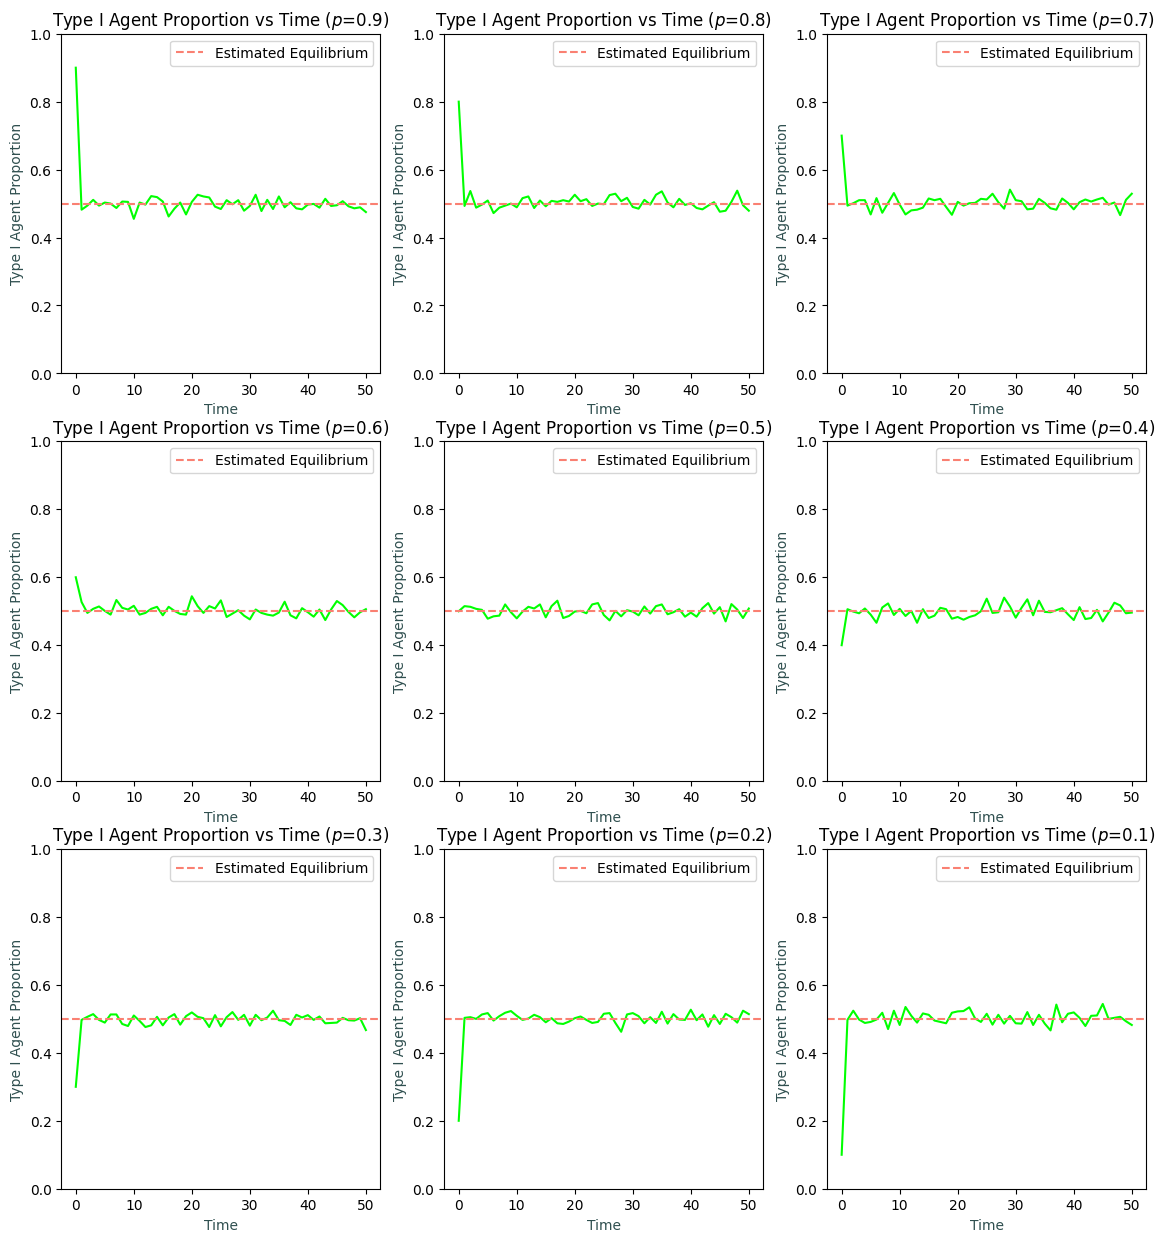

In [48]:
plot_agent_type(POPULATION_PAYOFF)

### Simulation 2

Individual can choose between:
1) Defect
2) Coop

From the result, we can see that regardless of the initial proportion of the population playing "defect", $p$ this proportion **always converges to 0 over time**, which meets our expectation.  

It makes sense as we should not have any Defect individual to maximize the social reward.

The Defect proportion doesn't fluctuate when it reaches 0, as there is no more Defect individual for Coop Individual to replicate.  

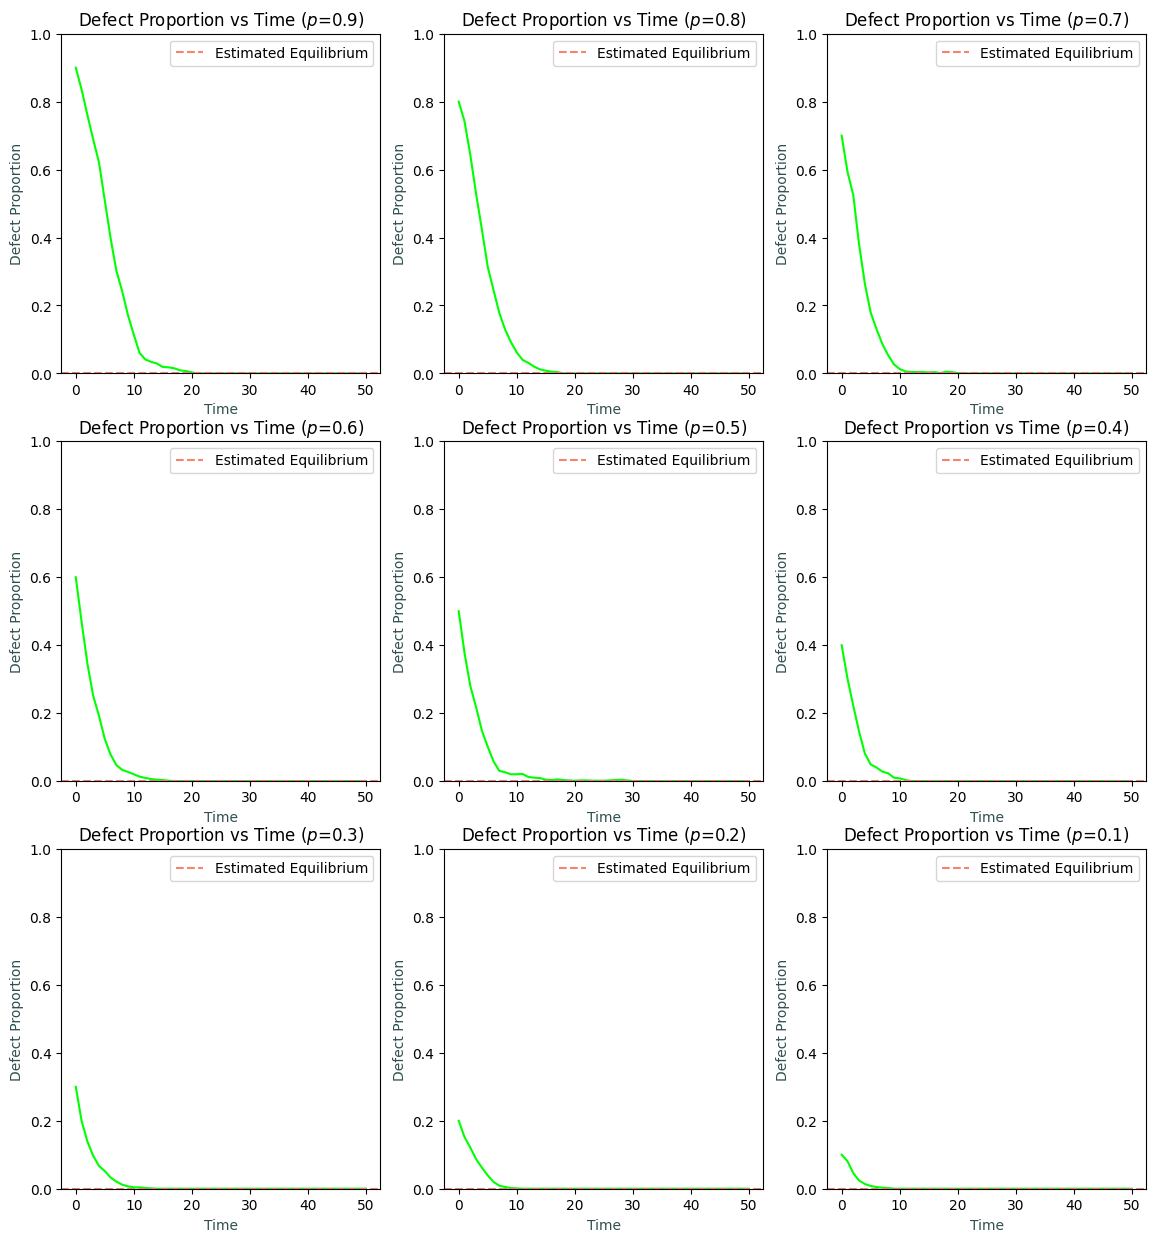

In [49]:
plot_action_type(ACTION_PAYOFF)

### Comparison of replicator dynamics simulation with GT model

As we can see the replicator dynamics simulation converges with 50/50 type I vs type II agents and all agents cooperating, this very much matches the solution which the GT models converged on, for the 4x4 matrix, the pareto optimal outcome and nash equilibrium is the *(Find A, Find Type II Agent)-(Find Type I Agent, Find B)* strategy combination, which is essentially full cooperation from both agents, and from the evolutionary GT model, the pareto optimal outcome and nash equilibrium is the *Coop-Coop* strategy combination. This also matches the results and analysis of the best DQN model from the implementation and makes complete sense, if type I agent takes the shortest path to A, then works together with type II agent to come to an efficient handover point to pass the item, and the type II agent takes the shortest path to B, this accomplishes all agents' individual tasks in the least number of moves thus incurring the least movement penalty and all agents receive the highest possible payoff/reward.